In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib_inline
import numpy as np
import pandas as pd
import seaborn as sns

import is3_broker_rl

%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
sns.set_style("whitegrid")

In [25]:
DATA_DIR = Path(is3_broker_rl.__file__).parent.parent / "data"
ANALYSIS_DIR = DATA_DIR / "trial4_consumption_training1"
NOTEBOOKS_DIR = Path(is3_broker_rl.__file__).parent.parent / "notebooks"

In [3]:
df_action = pd.read_csv(ANALYSIS_DIR / "consumption_action.csv")
df_reward = pd.read_csv(ANALYSIS_DIR / "consumption_reward.csv")

### Correlation between `capacity_costs` and `consumption_share`

In [4]:
df_reward.groupby("episode_id").mean()[["reward", "consumptionShare", "capacity_costs"]].corr()

,reward,consumptionShare,capacity_costs
reward,1.000000,0.107481,0.761257
consumptionShare,0.107481,1.000000,-0.271484
capacity_costs,0.761257,-0.271484,1.000000


### Piece-wise linear penalty for consumption share

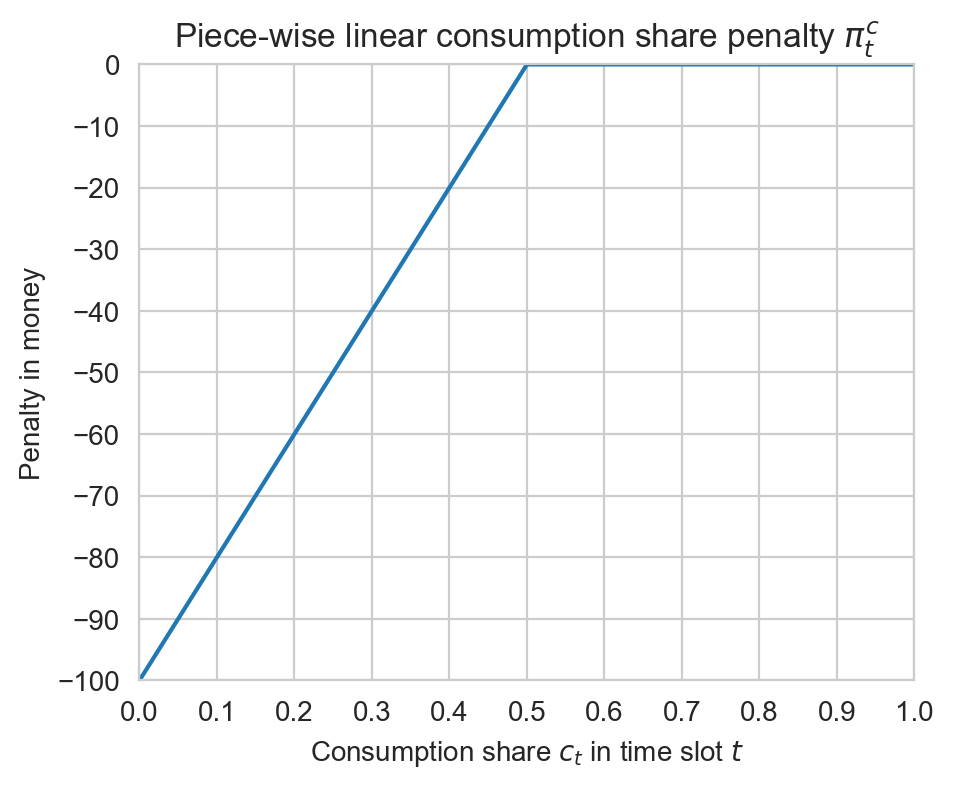

In [39]:
fig, ax = plt.subplots(figsize=(5, 4))
x = np.linspace(0, 1, 1000)
y = (0.5 - x) * -100 * np.power(0.5, -1)
y[y > 0] = 0
sns.lineplot(x=x, y=y, ax=ax)
ax.set_xmargin(0)
ax.set_ylim(-100, 0)
ax.xaxis.set_ticks(np.arange(0, 1.1, 0.1))
ax.yaxis.set_ticks(np.arange(-100, 10, 10))
ax.set_xlabel("Consumption share $c_t$ in time slot $t$")
ax.set_ylabel("Penalty in money")
ax.set_title("Piece-wise linear consumption share penalty $\pi_t^c$")
fig.savefig(NOTEBOOKS_DIR / "figures" / "piece-wise_linear_penalty.pdf")